In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data = data.drop(columns = ['Loan_ID'], axis = 1)
data.shape

(614, 12)

In [6]:
# filling null values

data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

data.isna().sum().sum()

0

### Visualization for categorical data

In [7]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Visualization

The value counts for Gender is

Male      502
Female    112
Name: Gender, dtype: int64 



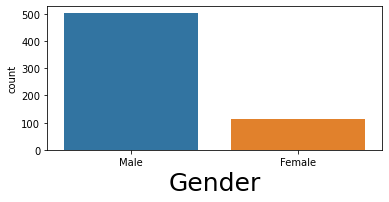

The value counts for Married is

Yes    401
No     213
Name: Married, dtype: int64 



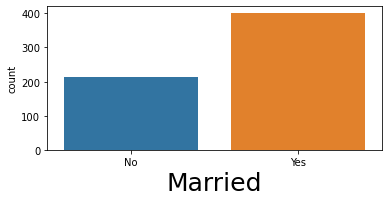

The value counts for Education is

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 



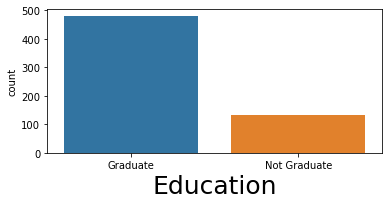

The value counts for Self_Employed is

No     532
Yes     82
Name: Self_Employed, dtype: int64 



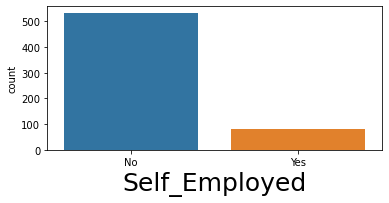

The value counts for Property_Area is

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 



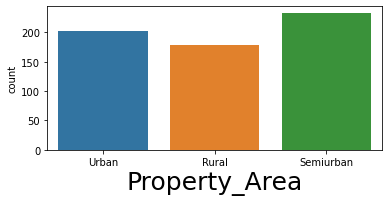

The value counts for Dependents is

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64 



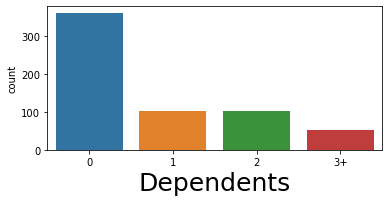

The value counts for Credit_History is

1.0    525
0.0     89
Name: Credit_History, dtype: int64 



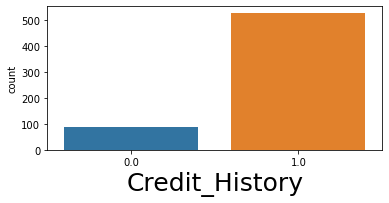

The value counts for Loan_Amount_Term is

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64 



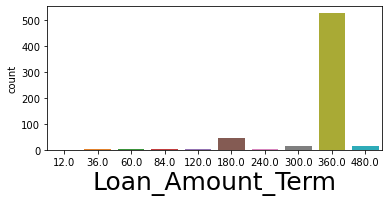

In [8]:
data_cat = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents','Credit_History','Loan_Amount_Term']

plotnumber = 1

for column in data[data_cat] :
    plt.figure(figsize = (6,28))
    if plotnumber <=9:
        ax = plt.subplot(9,1,plotnumber)
        sns.countplot(data[data_cat][column])
        plt.xlabel(column,fontsize = 25)
        print(f"The value counts for {column} is\n")
        print(data[data_cat][column].value_counts(),'\n')
        plt.show()
    plotnumber +=1

- More number of the applicants are Male
- More nummber of the applicants are Married
- More number of the applicants are graduate
- More number of the applicants are NOT self-employed (that may be the reason they need loans)
- More number of applicants has a credit history
- More number of the applications are approved
- Loan tenure of 3 years is the maximum among all other tenures.

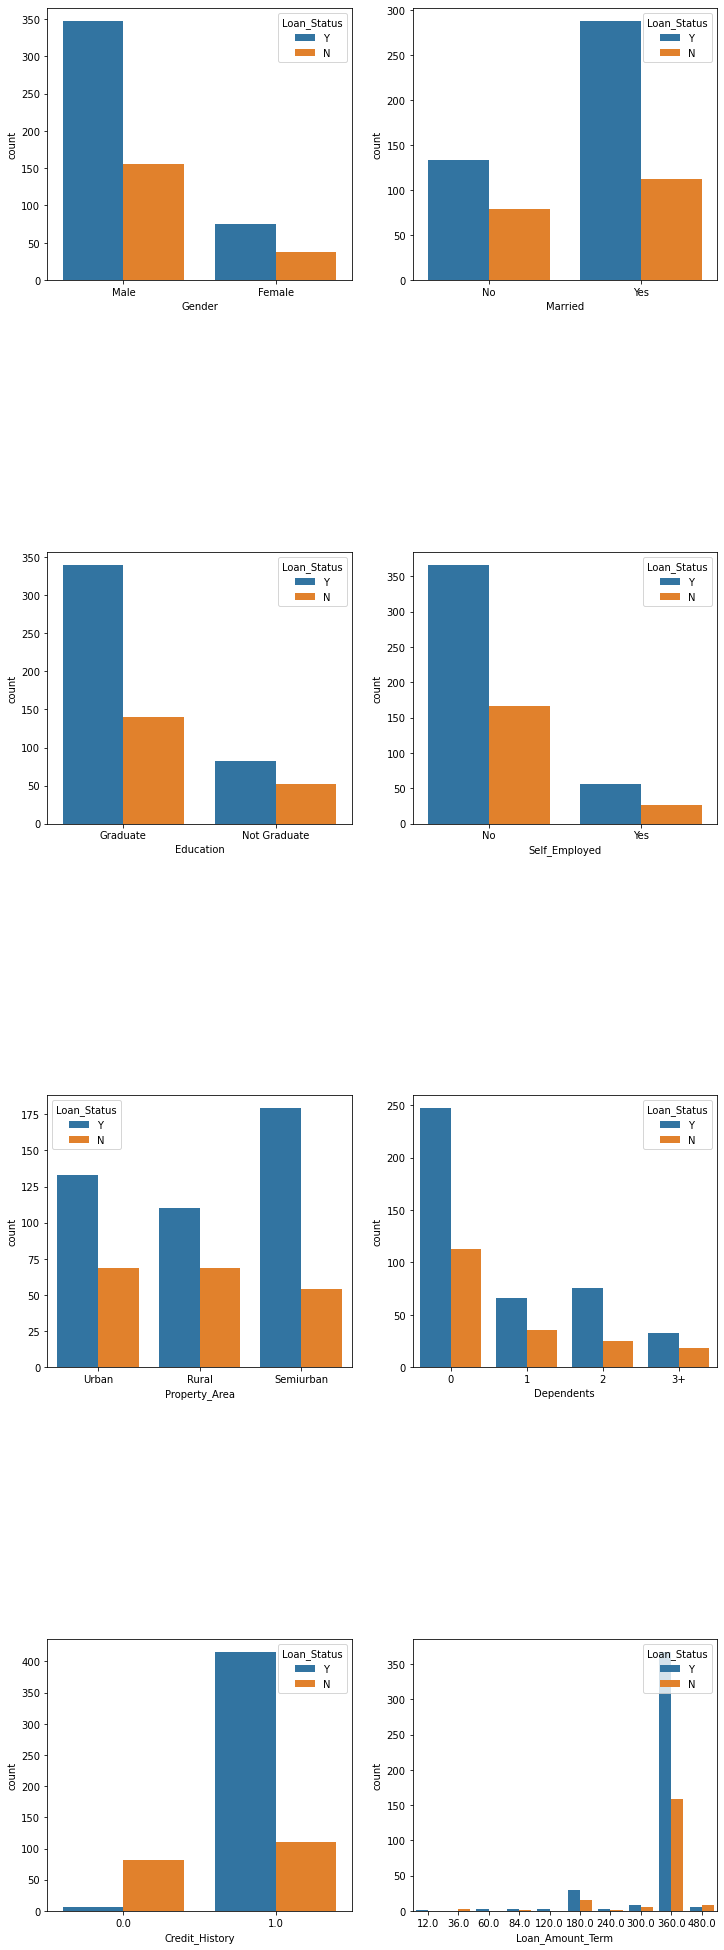

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes = plt.subplots(4,2,figsize=(12,35))
for idx,cat_col in enumerate(data_cat):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=data,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

## What can we add about the categorical data?
- Since there are a lot more male applicants, more number of male applicants are accepted; and about 2/3 of each from both populations are accepted.
- Married couples are likely to be accepted than single applicants. 
- Graduates have better likelihood of being accepted
- Very less number of applicants are self-employed and about 2/3 of them are accepted.
- Most applicants live in semi-urban and about 3/4 of them are accepted followed by urban and then rural.
- A huge proportion of applicants do not have dependents and are likely to be accepted.
- Applicants with a credit history has a very good chance of being accepted.
- Loan term of 3 years is the most common term and are likely to be accepted as well.

## Visualization for continuous data
- Lets plot a distribution of the continuous data to see if the distributions are normal or skewed.

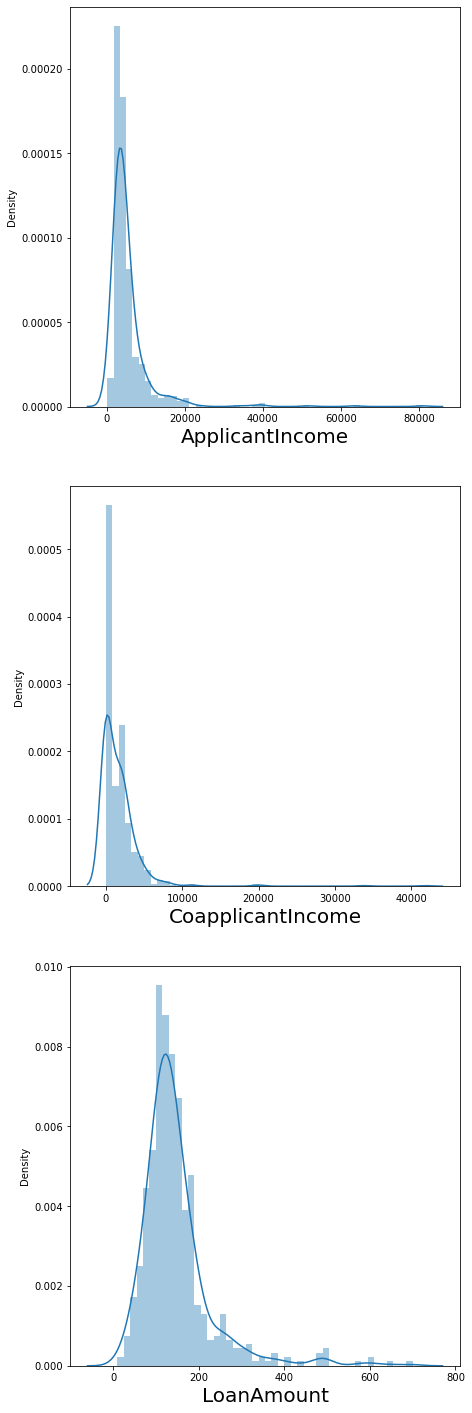

In [10]:
data_cont = data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

plt.figure(figsize = (7,25))
plotnumber = 1

for column in data_cont :
    if plotnumber <=3 :
        ax = plt.subplot(3,1,plotnumber)
        sns.distplot(data_cont[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

In [11]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [12]:
data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

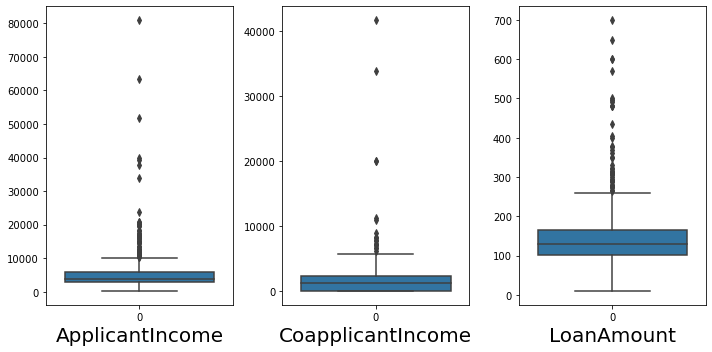

In [13]:
plt.figure(figsize = (10,5))
graph = 1

for column in data_cont:
    if graph <=3 :
        ax = plt.subplot(1,3,graph)
        sns.boxplot(data=data_cont[column])
        
        plt.xlabel(column,fontsize = 20)
    graph +=1
plt.tight_layout()

In [14]:
# Find the IQR to identify the outliers

# 1st quantile
q1 = data.quantile(0.25)

# 3rd quantile
q3 = data.quantile(0.75)

#IQR
iqr = q3 - q1
iqr

ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
Loan_Amount_Term        0.00
Credit_History          0.00
dtype: float64

In [15]:
income_high = q3.ApplicantIncome + (1.5*iqr.ApplicantIncome)
index = np.where(data['ApplicantIncome']>income_high)
data = data.drop(data.index[index])
data.reset_index().head()

coincome_high = q3.CoapplicantIncome + (1.5*iqr.CoapplicantIncome)
index = np.where(data['CoapplicantIncome']>coincome_high)
data = data.drop(data.index[index])
data.reset_index().head()

loan_high = q3.LoanAmount + (1.5*iqr.LoanAmount)
index = np.where(data['LoanAmount']>loan_high)
data = data.drop(data.index[index])
data.reset_index().head()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


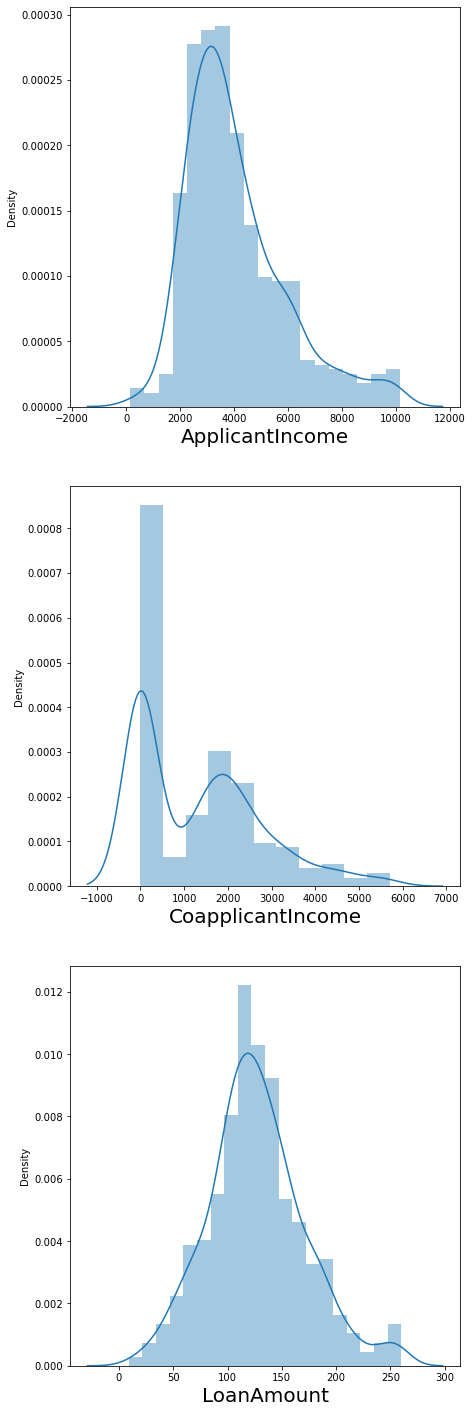

In [16]:
data_cont = data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

plt.figure(figsize = (7,25))
plotnumber = 1

for column in data_cont :
    if plotnumber <=3 :
        ax = plt.subplot(3,1,plotnumber)
        sns.distplot(data_cont[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

In [17]:
data.skew()

ApplicantIncome      1.142234
CoapplicantIncome    0.845905
LoanAmount           0.401178
Loan_Amount_Term    -2.428175
Credit_History      -2.013048
dtype: float64

**Let's do some transformation on the continuous data so that the distribution looks normal**

In [18]:
dat_cont = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
data[dat_cont] = scaler.fit_transform(data[dat_cont].values)
data[dat_cont].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,1.028040,-1.142445,0.471521
1,0.435358,0.742900,0.070769
2,-0.493487,-1.142445,-1.420430
3,-0.793451,0.904663,-0.108173
4,1.092600,-1.142445,0.355223


In [19]:
data.skew()

ApplicantIncome      0.074103
CoapplicantIncome   -0.229091
LoanAmount           0.037828
Loan_Amount_Term    -2.428175
Credit_History      -2.013048
dtype: float64

**Now lets see the distribution once more to check if it is normally distributed or not**

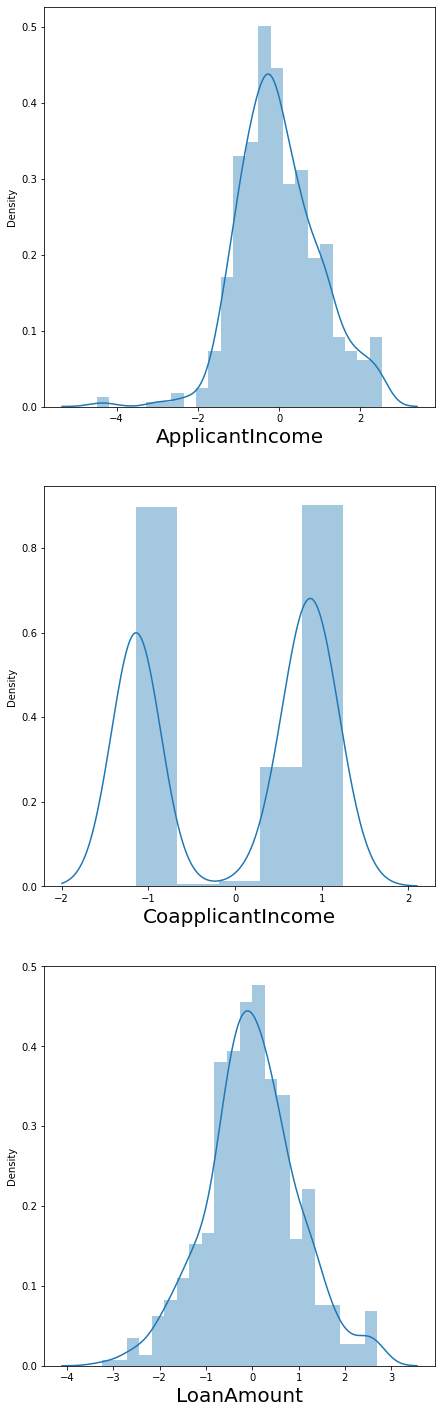

In [20]:
data_cont = data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

plt.figure(figsize = (7,25))
plotnumber = 1

for column in data_cont :
    if plotnumber <=3 :
        ax = plt.subplot(3,1,plotnumber)
        sns.distplot(data_cont[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

**The plots are more or less normally distributed. Now lets proceed with the pre-processing.**

### Encoding of dataframe

In [21]:
from sklearn.preprocessing import LabelEncoder

# Select the columns with object datatype
object_columns = data.select_dtypes(include='object').columns

# Initialize the LabelEncoder object
le = LabelEncoder()

# Encode the object columns
for col in object_columns:
    data[col] = le.fit_transform(data[col])

# View the encoded data
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1.028040,-1.142445,0.471521,360.0,1.0,2,1
1,1,1,1,0,0,0.435358,0.742900,0.070769,360.0,1.0,0,0
2,1,1,0,0,1,-0.493487,-1.142445,-1.420430,360.0,1.0,2,1
3,1,1,0,1,0,-0.793451,0.904663,-0.108173,360.0,1.0,2,1
4,1,0,0,0,0,1.092600,-1.142445,0.355223,360.0,1.0,2,1


### Checking multicollinearity

<AxesSubplot:>

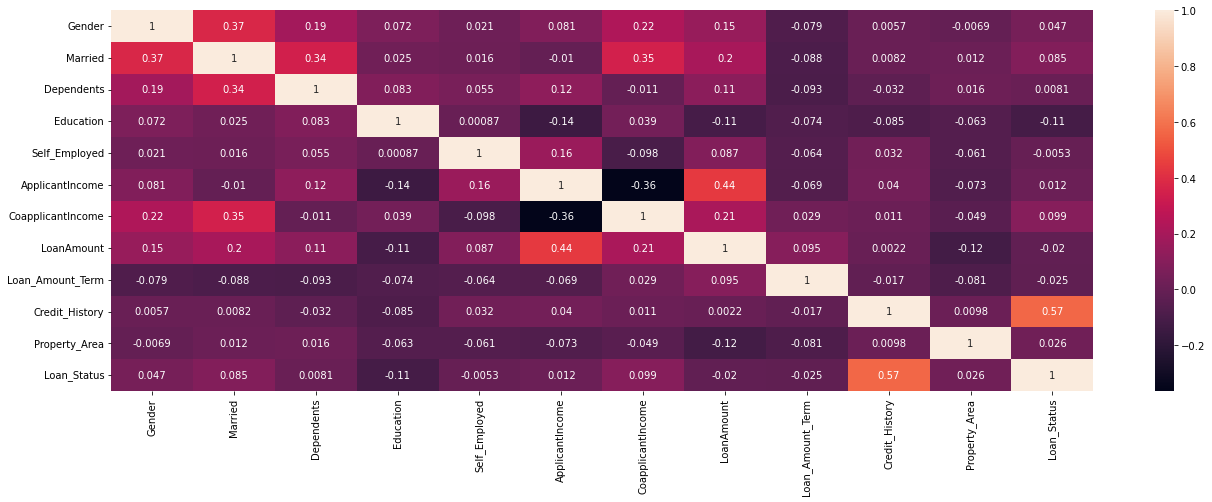

In [22]:
plt.figure(figsize = (22,7))
sns.heatmap(data.corr(), annot = True)

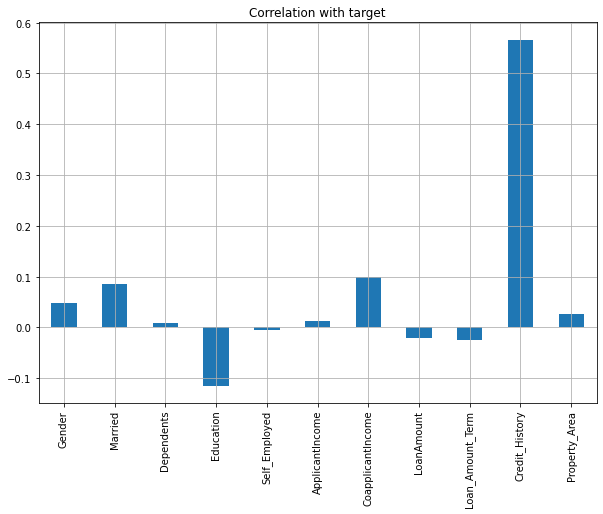

In [23]:
# finding correlation of features with target using corrwith

corr = data.drop('Loan_Status', axis = 1).corrwith(data.Loan_Status)
# Visualize the correlation
corr.plot(kind = 'bar', grid = True, figsize = (10,7),
          title = "Correlation with target")
plt.show()

### Let's check if data is balanced or not

1    372
0    163
Name: Loan_Status, dtype: int64


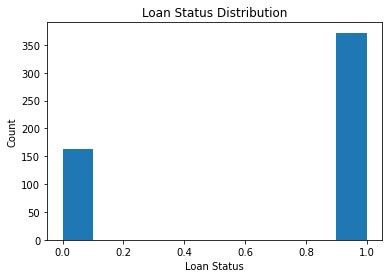

1    0.695327
0    0.304673
Name: Loan_Status, dtype: float64


In [24]:
# Check the number of instances in each class
class_counts = data['Loan_Status'].value_counts()
print(class_counts)

# Visualize the distribution of the target variable
plt.hist(data['Loan_Status'])
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# Calculate class distribution of target variable
class_weights = class_counts / sum(class_counts)
print(class_weights)

In [25]:
x = data.drop('Loan_Status',axis = 1)
y = data.Loan_Status

from collections import Counter
Counter(y)

Counter({1: 372, 0: 163})

### We need to balance the data using SMOTE

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 56)

#sm = SMOTE()
ove_smp = SMOTE(0.75)

x_train_ns, y_train_ns, = ove_smp.fit_sample(x_train, y_train)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({1: 280, 0: 121})
The number of classes after fit Counter({1: 280, 0: 210})


### Model building for prediction of Loan status

In [27]:
x = data.drop('Loan_Status', axis = 1)
y = data.Loan_Status

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sys
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

In [39]:
dt = DecisionTreeClassifier()
lr = LogisticRegression()
kn = KNeighborsClassifier()
bg = BaggingClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()

### Decision Tree Classifer

In [30]:
for i in range(0,20):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = i)
    dt.fit(x_train,y_train)
    y_train_pred = dt.predict(x_train)
    y_test_pred = dt.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {accuracy_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {accuracy_score(y_test,y_test_pred)}\n")

At random state 0, the training accuracy is : 1.0
At random state 0, the testing accuracy is : 0.7313432835820896

At random state 1, the training accuracy is : 1.0
At random state 1, the testing accuracy is : 0.7313432835820896

At random state 2, the training accuracy is : 1.0
At random state 2, the testing accuracy is : 0.6567164179104478

At random state 3, the training accuracy is : 1.0
At random state 3, the testing accuracy is : 0.7089552238805971

At random state 4, the training accuracy is : 1.0
At random state 4, the testing accuracy is : 0.746268656716418

At random state 5, the training accuracy is : 1.0
At random state 5, the testing accuracy is : 0.7089552238805971

At random state 6, the training accuracy is : 1.0
At random state 6, the testing accuracy is : 0.7014925373134329

At random state 7, the training accuracy is : 1.0
At random state 7, the testing accuracy is : 0.7164179104477612

At random state 8, the training accuracy is : 1.0
At random state 8, the testing 

### Logistic Regression

In [40]:
for i in range(0,20):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = i)
    lr.fit(x_train,y_train)
    y_train_pred = lr.predict(x_train)
    y_test_pred = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {accuracy_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {accuracy_score(y_test,y_test_pred)}\n")

At random state 0, the training accuracy is : 0.8354114713216958
At random state 0, the testing accuracy is : 0.7835820895522388

At random state 1, the training accuracy is : 0.8129675810473815
At random state 1, the testing accuracy is : 0.8507462686567164

At random state 2, the training accuracy is : 0.8379052369077307
At random state 2, the testing accuracy is : 0.7686567164179104

At random state 3, the training accuracy is : 0.8179551122194514
At random state 3, the testing accuracy is : 0.835820895522388

At random state 4, the training accuracy is : 0.8179551122194514
At random state 4, the testing accuracy is : 0.835820895522388

At random state 5, the training accuracy is : 0.8179551122194514
At random state 5, the testing accuracy is : 0.835820895522388

At random state 6, the training accuracy is : 0.827930174563591
At random state 6, the testing accuracy is : 0.8134328358208955

At random state 7, the training accuracy is : 0.8229426433915212
At random state 7, the testin

### KNeighbors Classifier

In [31]:
for i in range(0,20):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = i)
    kn.fit(x_train,y_train)
    y_train_pred = kn.predict(x_train)
    y_test_pred = kn.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {accuracy_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {accuracy_score(y_test,y_test_pred)}\n")

At random state 0, the training accuracy is : 0.8204488778054863
At random state 0, the testing accuracy is : 0.6716417910447762

At random state 1, the training accuracy is : 0.7830423940149626
At random state 1, the testing accuracy is : 0.753731343283582

At random state 2, the training accuracy is : 0.7955112219451371
At random state 2, the testing accuracy is : 0.6865671641791045

At random state 3, the training accuracy is : 0.7855361596009975
At random state 3, the testing accuracy is : 0.753731343283582

At random state 4, the training accuracy is : 0.7955112219451371
At random state 4, the testing accuracy is : 0.7388059701492538

At random state 5, the training accuracy is : 0.7930174563591023
At random state 5, the testing accuracy is : 0.746268656716418

At random state 6, the training accuracy is : 0.8104738154613467
At random state 6, the testing accuracy is : 0.6865671641791045

At random state 7, the training accuracy is : 0.7905236907730673
At random state 7, the testi

### Bagging Classifier

In [32]:
for i in range(0,20):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = i)
    bg.fit(x_train,y_train)
    y_train_pred = bg.predict(x_train)
    y_test_pred = bg.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {accuracy_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {accuracy_score(y_test,y_test_pred)}\n")

At random state 0, the training accuracy is : 0.9900249376558603
At random state 0, the testing accuracy is : 0.7313432835820896

At random state 1, the training accuracy is : 0.9950124688279302
At random state 1, the testing accuracy is : 0.7835820895522388

At random state 2, the training accuracy is : 0.9925187032418953
At random state 2, the testing accuracy is : 0.6940298507462687

At random state 3, the training accuracy is : 0.9925187032418953
At random state 3, the testing accuracy is : 0.7835820895522388

At random state 4, the training accuracy is : 0.9900249376558603
At random state 4, the testing accuracy is : 0.7686567164179104

At random state 5, the training accuracy is : 0.9925187032418953
At random state 5, the testing accuracy is : 0.746268656716418

At random state 6, the training accuracy is : 0.9850374064837906
At random state 6, the testing accuracy is : 0.7313432835820896

At random state 7, the training accuracy is : 0.9850374064837906
At random state 7, the tes

### Random Forest Classifier

In [33]:
for i in range(0,20):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = i)
    rf.fit(x_train,y_train)
    y_train_pred = rf.predict(x_train)
    y_test_pred = rf.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {accuracy_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {accuracy_score(y_test,y_test_pred)}\n")

At random state 0, the training accuracy is : 1.0
At random state 0, the testing accuracy is : 0.746268656716418

At random state 1, the training accuracy is : 1.0
At random state 1, the testing accuracy is : 0.8134328358208955

At random state 2, the training accuracy is : 1.0
At random state 2, the testing accuracy is : 0.746268656716418

At random state 3, the training accuracy is : 1.0
At random state 3, the testing accuracy is : 0.8208955223880597

At random state 4, the training accuracy is : 1.0
At random state 4, the testing accuracy is : 0.8134328358208955

At random state 5, the training accuracy is : 1.0
At random state 5, the testing accuracy is : 0.7686567164179104

At random state 6, the training accuracy is : 1.0
At random state 6, the testing accuracy is : 0.7985074626865671

At random state 7, the training accuracy is : 1.0
At random state 7, the testing accuracy is : 0.8134328358208955

At random state 8, the training accuracy is : 1.0
At random state 8, the testing a

### Gradient Boosting Classifier

In [34]:
for i in range(0,20):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = i)
    gb.fit(x_train,y_train)
    y_train_pred = gb.predict(x_train)
    y_test_pred = gb.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {accuracy_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {accuracy_score(y_test,y_test_pred)}\n")

At random state 0, the training accuracy is : 0.9351620947630923
At random state 0, the testing accuracy is : 0.7238805970149254

At random state 1, the training accuracy is : 0.912718204488778
At random state 1, the testing accuracy is : 0.7910447761194029

At random state 2, the training accuracy is : 0.9376558603491272
At random state 2, the testing accuracy is : 0.746268656716418

At random state 3, the training accuracy is : 0.9251870324189526
At random state 3, the testing accuracy is : 0.8208955223880597

At random state 4, the training accuracy is : 0.9177057356608479
At random state 4, the testing accuracy is : 0.7910447761194029

At random state 5, the training accuracy is : 0.9276807980049875
At random state 5, the testing accuracy is : 0.7835820895522388

At random state 6, the training accuracy is : 0.9226932668329177
At random state 6, the testing accuracy is : 0.746268656716418

At random state 7, the training accuracy is : 0.9326683291770573
At random state 7, the testi

### Support Vector Classifier

In [37]:
for i in range(0,20):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = i)
    svc.fit(x_train,y_train)
    y_train_pred = svc.predict(x_train)
    y_test_pred = svc.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {accuracy_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {accuracy_score(y_test,y_test_pred)}\n")

At random state 0, the training accuracy is : 0.6982543640897756
At random state 0, the testing accuracy is : 0.6865671641791045

At random state 1, the training accuracy is : 0.683291770573566
At random state 1, the testing accuracy is : 0.7313432835820896

At random state 2, the training accuracy is : 0.6957605985037406
At random state 2, the testing accuracy is : 0.6940298507462687

At random state 3, the training accuracy is : 0.6957605985037406
At random state 3, the testing accuracy is : 0.6940298507462687

At random state 4, the training accuracy is : 0.7007481296758105
At random state 4, the testing accuracy is : 0.6791044776119403

At random state 5, the training accuracy is : 0.6807980049875312
At random state 5, the testing accuracy is : 0.7388059701492538

At random state 6, the training accuracy is : 0.7007481296758105
At random state 6, the testing accuracy is : 0.6791044776119403

At random state 7, the training accuracy is : 0.6982543640897756
At random state 7, the tes

### Since Logistic Regression gives the best accuracy for random state 15, we will proceed with this algorithm

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 15)
lr.fit(x_train, y_train)

LogisticRegression()

In [42]:
y_test_pred = lr.predict(x_test)
print(f"The accuracy score is {accuracy_score(y_test,y_test_pred)*100:.2f} %")

The accuracy score is 87.31 %


### Cross Validation

In [43]:
test_acc = accuracy_score(y_test,y_test_pred)

for i in range (2,10):
    cv_score = cross_val_score(lr,x,y,cv = i)
    cv_mean  = cv_score.mean()
    print(f"At cv = {i},cv_score = {cv_mean} and accuracy for testing = {test_acc}\n")

At cv = 2,cv_score = 0.8205950584157863 and accuracy for testing = 0.8731343283582089

At cv = 3,cv_score = 0.8093549264536648 and accuracy for testing = 0.8731343283582089

At cv = 4,cv_score = 0.8206009426551453 and accuracy for testing = 0.8731343283582089

At cv = 5,cv_score = 0.8242990654205608 and accuracy for testing = 0.8731343283582089

At cv = 6,cv_score = 0.8205368289637952 and accuracy for testing = 0.8731343283582089

At cv = 7,cv_score = 0.8244312078898545 and accuracy for testing = 0.8731343283582089

At cv = 8,cv_score = 0.822535052012664 and accuracy for testing = 0.8731343283582089

At cv = 9,cv_score = 0.8245134965473948 and accuracy for testing = 0.8731343283582089



In [62]:
cv_score = cross_val_score(lr,x,y,cv = 9)
cv_mean = cv_score.mean()
cv_mean

0.8245134965473948

### Tuning 

In [63]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size = 0.25,random_state = 15)

clf = LogisticRegression()

params = {'tol':[0.0001],'C':[0.1,0.01,0.001,1.0],'fit_intercept':[True],'random_state':range(15),'max_iter':[40,50,80,100]}

grd = GridSearchCV(clf, param_grid = params)
grd.fit(x_train, y_train)
print('best parameters -->',grd.best_params_)

clf = grd.best_estimator_    # reinstantiating with best parameters

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

rf_conf_mat = confusion_matrix(y_test, y_pred)

print('\nconfusion matrix -->','\n', rf_conf_mat)
print('\nAccuracy rf normal -->', accuracy_score(y_test,y_pred))

best parameters --> {'C': 1.0, 'fit_intercept': True, 'max_iter': 80, 'random_state': 0, 'tol': 0.0001}

confusion matrix --> 
 [[ 14  16]
 [  1 103]]

Accuracy rf normal --> 0.8731343283582089


In [53]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.47      0.62        30
           1       0.87      0.99      0.92       104

    accuracy                           0.87       134
   macro avg       0.90      0.73      0.77       134
weighted avg       0.88      0.87      0.86       134



In [58]:
# Plot ROC/AUC curve for multiple models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

In [54]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
gb = GradientBoostingClassifier()

In [55]:
# train, test, split
x = data.drop(columns=['Loan_Status'], axis = 1)
y = data['Loan_Status']

x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size = 0.25,random_state = 44)

# training with all the classifiers
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
gb.fit(x_train,y_train)

print("All models are trained!")

All models are trained!


In [56]:
# all models score captured
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)
gb.score(x_test,y_test)

print("All model test score captured")

All model test score captured


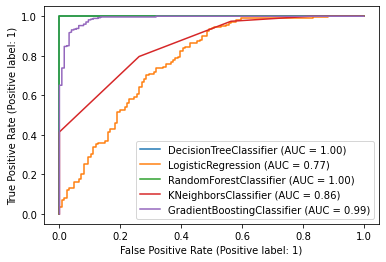

In [59]:
# How well our model works on Training data
disp = plot_roc_curve(dt, x_train, y_train)

plot_roc_curve(lr, x_train, y_train, ax = disp.ax_)  # ax_ = axis with confusion matrix

plot_roc_curve(rf, x_train, y_train, ax = disp.ax_)

plot_roc_curve(kn, x_train, y_train, ax = disp.ax_)

plot_roc_curve(gb, x_train, y_train, ax = disp.ax_)

plt.legend(prop = {'size':10}, loc = 'lower right')

plt.show()

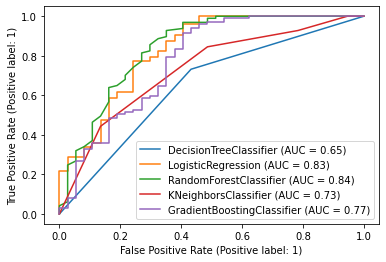

In [60]:
# How well our model works on test data

disp = plot_roc_curve(dt, x_test, y_test)

plot_roc_curve(lr, x_test, y_test, ax = disp.ax_)  # ax_ = axis with confusion matrix

plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)

plot_roc_curve(kn, x_test, y_test, ax = disp.ax_)

plot_roc_curve(gb, x_test, y_test, ax = disp.ax_)

plt.legend(prop = {'size':10}, loc = 'lower right')

plt.show()

#### Logistic Regression gives the most consistent accuracy. So, we will choose this model for prediction.

In [61]:
import pickle
import joblib

joblib.dump(lr,'Loan prediction.pkl')

['Loan prediction.pkl']